In [1]:
import pandas as pd
import numpy as np
import scipy.stats as np
import sqlite3
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import statsmodels.api as sm

In [2]:
gross_budget=pd.read_csv('../Data/clean_data/gross_budget.csv')
gross_budget.head()

,Unnamed: 0,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
0,0,Toy Story 3,652000000,200000000,415004880,1068879522,868879522,434.439761
1,1,Inception,535700000,160000000,292576195,835524642,675524642,422.202901
2,2,Shrek Forever After,513900000,165000000,238736787,756244673,591244673,358.330105
3,3,The Twilight Saga: Eclipse,398000000,68000000,300531751,706102828,638102828,938.386512
4,4,Iron Man 2,311500000,170000000,312433331,621156389,451156389,265.386111


In [3]:
correlation_matrix_gb = gross_budget[['production_budget','net_profit','domestic_gross_y','worldwide_gross']].corr()
correlation_matrix_gb

,production_budget,net_profit,domestic_gross_y,worldwide_gross
production_budget,1.000000,0.658792,0.703271,0.782763
net_profit,0.658792,1.000000,0.933374,0.983865
domestic_gross_y,0.703271,0.933374,1.000000,0.939330
worldwide_gross,0.782763,0.983865,0.939330,1.000000


In [4]:
x = gross_budget['production_budget']
y = gross_budget['worldwide_gross']

x = sm.add_constant(x)

model = sm.OLS(y, x).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:        worldwide_gross   R-squared:                       0.613
Model:                            OLS   Adj. R-squared:                  0.612
Method:                 Least Squares   F-statistic:                     1955.
Date:                Thu, 07 Dec 2023   Prob (F-statistic):          7.29e-257
Time:                        21:24:48   Log-Likelihood:                -25035.
No. Observations:                1238   AIC:                         5.007e+04
Df Residuals:                    1236   BIC:                         5.008e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const             -2.412e+06   5.45e+0

In [5]:
sorted_budget=gross_budget.sort_values(by='ROI', ascending=False)
sorted_budget.head(25)

,Unnamed: 0,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
842,850,The Gallows,20200000,100000,22764410,41656474,41556474,41556.474000
404,407,The Devil Inside,48500000,1000000,53262945,101759490,100759490,10075.949000
242,245,Insidious,43000000,1500000,54009150,99870886,98370886,6558.059067
824,831,Unfriended,31600000,1000000,32789645,64364198,63364198,6336.419800
31,33,Paranormal Activity 2,92800000,3000000,84752907,177512032,174512032,5817.067733
1067,1075,Split,140200000,5000000,138141585,278964806,273964806,5479.296120
1069,1077,Get Out,79400000,5000000,176040665,255367951,250367951,5007.359020
435,438,Chernobyl Diaries,19000000,1000000,18119640,42411721,41411721,4141.172100
210,212,Paranormal Activity 3,103000000,5000000,104028807,207039844,202039844,4040.796880
657,662,Annabelle,172800000,6500000,84273813,256862920,250362920,3851.737231


In [6]:
sorted_budget=gross_budget.sort_values(by='production_budget', ascending=True)
sorted_budget.head(25)

,Unnamed: 0,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
172,174,Tiny Furniture,0,50000,391674,424149,374149,748.298000
842,850,The Gallows,20200000,100000,22764410,41656474,41556474,41556.474000
1139,1147,A Ghost Story,0,100000,1594798,2769782,2669782,2669.782000
479,482,Your Sister's Sister,0,120000,1597486,3090593,2970593,2475.494167
486,489,Sound of My Voice,0,135000,408015,429448,294448,218.109630
324,327,Another Earth,456000,175000,1321194,2102779,1927779,1101.588000
317,320,Like Crazy,336000,250000,3395391,3728400,3478400,1391.360000
630,635,The Canyons,0,250000,59671,62375,-187625,-75.050000
488,491,Compliance,0,270000,319285,830700,560700,207.666667
746,752,Jackpot,1100000,400000,44452,44452,-355548,-88.887000


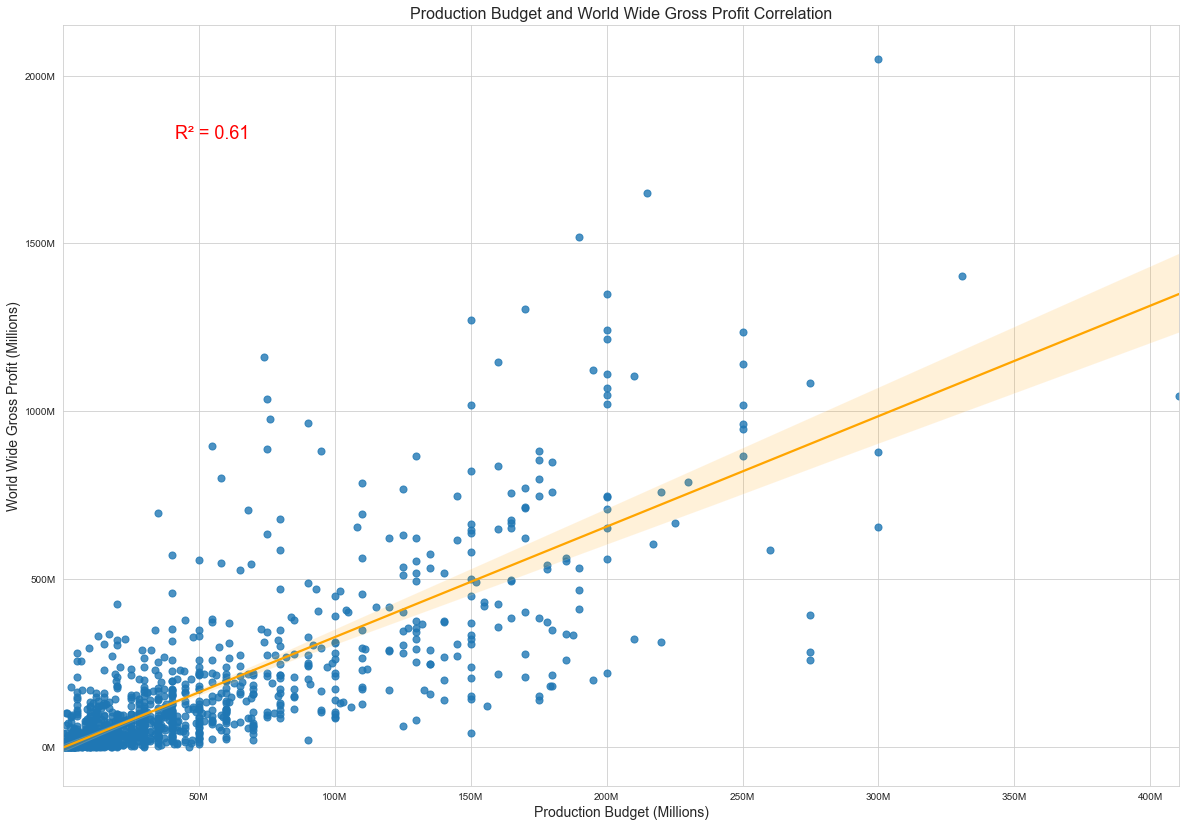

In [7]:
from matplotlib.ticker import FuncFormatter
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Assuming gross_budget is your DataFrame
# Replace these with your actual DataFrame and column names
x = gross_budget['production_budget']
y = gross_budget['worldwide_gross']

# Function to format axis labels in millions
def millions_formatter(x, pos):
    return f'{x / 1e6:.0f}M'

sns.set_style("whitegrid")

# Create the plot
plt.figure(figsize=(20, 14))
sns.regplot(x=x, y=y, data=gross_budget, scatter_kws={'s': 50}, line_kws={'color': 'orange'})

# Apply the formatter to the x-axis and y-axis
plt.gca().xaxis.set_major_formatter(FuncFormatter(millions_formatter))
plt.gca().yaxis.set_major_formatter(FuncFormatter(millions_formatter))


model = LinearRegression()
model.fit(x.values.reshape(-1, 1), y)
y_pred = model.predict(x.values.reshape(-1, 1))
r_squared = r2_score(y, y_pred)

# Annotate the plot with R-squared value
plt.annotate(f'R² = {r_squared:.2f}', xy=(0.1, 0.85), xycoords='axes fraction', fontsize=18, color='red')


plt.xlabel('Production Budget (Millions)', fontsize=14)
plt.ylabel('World Wide Gross Profit (Millions)', fontsize=14)
plt.title('Production Budget and World Wide Gross Profit Correlation', fontsize=16)

plt.savefig('../images/Linear_regression_plot_R2.png')

plt.show()

# What range in the lower 25th percentile of spending achieves the highest wordwide gross returns?

In [14]:
ROI_25 = gross_budget['production_budget'].quantile(.25)


lower_25th_percentile = gross_budget[gross_budget['production_budget'] <= ROI_25]
lower_25th_percentile.head()

,Unnamed: 0,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
31,33,Paranormal Activity 2,92800000,3000000,84752907,177512032,174512032,5817.067733
65,67,Easy A,16600000,8000000,58401464,76200721,68200721,852.509013
68,70,The Last Exorcism,26700000,1800000,41034350,70165900,68365900,3798.105556
70,72,Skyline,45400000,10000000,21416355,68264973,58264973,582.649730
72,74,Devil,29100000,10000000,33679655,63354114,53354114,533.541140


In [9]:
min_range = lower_25th_percentile['production_budget'].min()
max_range = lower_25th_percentile['production_budget'].max()


print(f"Minimum Range in Production Costs: {min_range}")
print(f"Maximum Range in Production Costs: {max_range}")

Minimum Range in Production Costs: 50000
Maximum Range in Production Costs: 10000000


In [28]:
# Assuming df is your DataFrame with 'ROI' and 'production_costs' columns
# Replace these with your actual DataFrame and column names
column_names = ['worldwide_gross', 'production_budget']

# Subset the DataFrame to include only rows in the lower 25th percentile of spending
lower_25th_percentile = gross_budget[gross_budget['production_budget'] <= gross_budget['production_budget'].quantile(0.25)]
                    
# Identify the range that maximizes worldwide gross returns
max_return_row = lower_25th_percentile.loc[lower_25th_percentile['worldwide_gross'].idxmax()]

# Extract relevant information from the row
max_return_range = max_return_row['production_budget']
max_return_value = max_return_row['worldwide_gross']

# Now, max_return_range contains the spending range, and max_return_value contains the corresponding worldwide gross returns
print(max_return_range)
print(max_return_value)

9500000
294654618


In [29]:
highest_ROI_25th_percentile = gross_budget[gross_budget['worldwide_gross'] == 294654618]
highest_ROI_25th_percentile

,Unnamed: 0,title,foreign_gross,production_budget,domestic_gross_y,worldwide_gross,net_profit,ROI
925,933,Dangal,290500000,9500000,12391761,294654618,285154618,3001.627558


In [30]:
# Assuming df is your DataFrame with 'ROI' and 'production_costs' columns
# Replace these with your actual DataFrame and column names
column_names = ['worldwide_gross', 'production_budget']

# Subset the DataFrame to include only rows in the lower 25th percentile of spending
lower_25th_percentile = gross_budget[gross_budget['production_budget'] <= gross_budget['production_budget'].quantile(0.25)]
                    
# Identify the range that maximizes worldwide gross returns
min_return_row = lower_25th_percentile.loc[lower_25th_percentile['worldwide_gross'].idxmin()]

# Extract relevant information from the row
min_return_range = min_return_row['production_budget']
min_return_value = min_return_row['worldwide_gross']

# Now, max_return_range contains the spending range, and max_return_value contains the corresponding worldwide gross returns
print(min_return_range)
print(min_return_value)

3000000
0


In [ ]:
lowest_worldwide_25th_percentile = gross_budget[gross_budget['worldwide_gross'] == 0]
lowest_worldwide_25th_percentile

In [31]:
column_names = ['worldwide_gross', 'production_budget']

# Subset the DataFrame to include only rows in the lower 25th percentile of spending
lower_25th_percentile = gross_budget[gross_budget['production_budget'] <= gross_budget['production_budget'].quantile(0.25)]

# Identify the range that maximizes worldwide gross returns
max_return_row = lower_25th_percentile.loc[lower_25th_percentile['worldwide_gross'].idxmax()]
min_return_row = lower_25th_percentile.loc[lower_25th_percentile['worldwide_gross'].idxmin()]

# Extract relevant information from the rows
max_return_range = (min_return_row['production_budget'], max_return_row['production_budget'])
max_return_value = (min_return_row['worldwide_gross'], max_return_row['worldwide_gross'])

# Now, max_return_range contains the spending range, and max_return_value contains the corresponding worldwide gross returns

print(max_return_range)
print(max_return_value)

(3000000, 9500000)
(0, 294654618)


Mean Squared Error: 1008604622000257.0


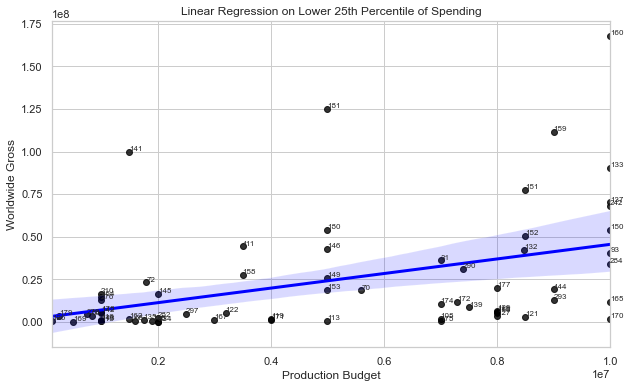

In [42]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import mplcursors

# Assuming df is your DataFrame with 'worldwide_gross' and 'production_budget' columns
column_names = ['worldwide_gross', 'production_budget']

# Subset the DataFrame to include only rows in the lower 25th percentile of spending
lower_25th_percentile = gross_budget[gross_budget['production_budget'] <= gross_budget['production_budget'].quantile(0.25)]

# Features (X) and target variable (y)
X = lower_25th_percentile[['production_budget']]
y = lower_25th_percentile['worldwide_gross']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a linear regression model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Plot the regression line using Seaborn
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
scatter_plot = sns.regplot(x=X_test.squeeze(), y=y_test, scatter_kws={'color': 'black'}, line_kws={'color': 'blue', 'linewidth': 3})
plt.xlabel('Production Budget')
plt.ylabel('Worldwide Gross')
plt.title('Linear Regression on Lower 25th Percentile of Spending')

# Add labels for each point
labels = lower_25th_percentile.index
for label, x, y in zip(labels, X_test.squeeze(), y_test):
    scatter_plot.text(x, y, label, fontsize=8, ha='left', va='bottom')

# Use mplcursors to display values when hovering
cursor = mplcursors.cursor(hover=True)
cursor.connect("add", lambda sel: sel.annotation.set_text(f"Index: {labels[sel.target.index]}, Production Budget: {X_test.iloc[sel.target.index].values[0]}, Worldwide Gross: {y_test.iloc[sel.target.index]}"))

plt.show()
